<a href="https://colab.research.google.com/github/SACHINSIROHI47/DataScience_with_Python_Programming_Project/blob/main/K_Means-With-PCA-Complete%20Exercise%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-means with PCA¶**
K-means is an unsupervised learning method for clustering data points. The algorithm iteratively divides data points into K clusters by minimizing the variance in each cluster.

Here, we will show you how to estimate the best value for K using the elbow method, then use K-means clustering to group the data points into clusters.

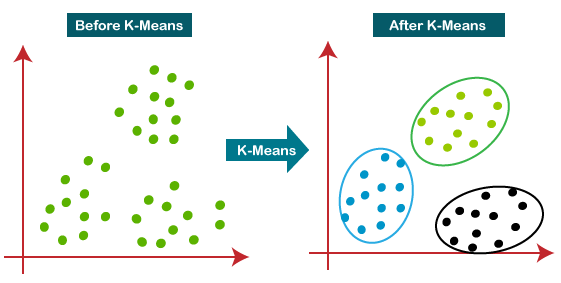

In [27]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

data=load_digits().data
df=pd.DataFrame(data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


**PCA- Principal Component Analysis**

reducing the dimensionality of data.

**Reduces dimensionality**

PCA creates new variables that are uncorrelated and gradually reduce the variance of the system


PCA(n_components=2)
(1797, 2)


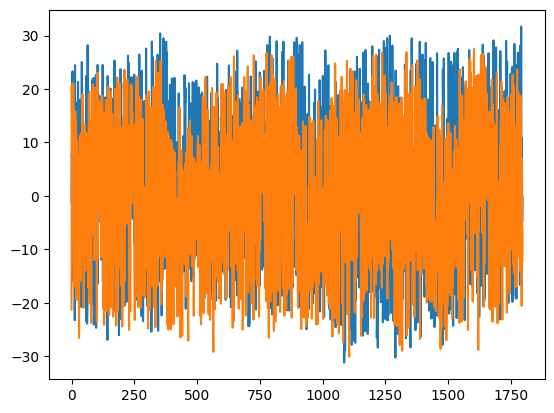

In [28]:
pca=PCA(2)
print(pca)
#Transpose the data
df=pca.fit_transform(data)
df.shape
print(df.shape)
plt.plot(df)
plt.show()

In [32]:
kmeans=KMeans(n_clusters=10,random_state=0)
#fit the model
kmeans.fit(df)
#predict the lebels of clusters
label=kmeans.fit_predict(df)
print(label)
print(label.shape)

[9 4 5 ... 5 3 3]
(1797,)


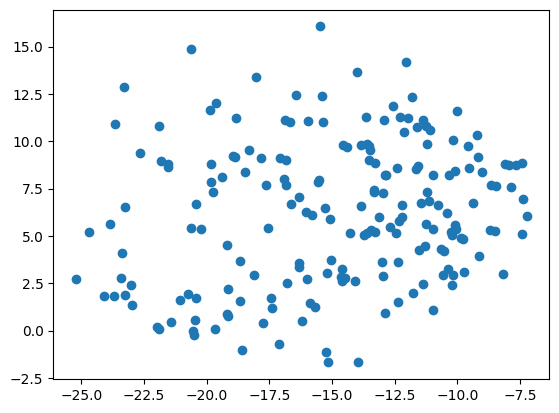

In [45]:
#display df dataset  using scatter chart
import matplotlib.pyplot as plt
flabel=df[label==0]
# print(flabel)
plt.scatter(flabel[:,0],flabel[:,1])
plt.show()

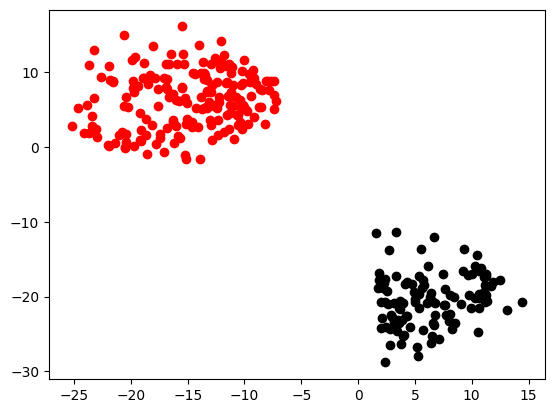

In [37]:
flabel2=df[label==0]
flabel8=df[label==1]
plt.scatter(flabel2[:,0],flabel2[:,1],color='red')
plt.scatter(flabel8[:,0],flabel8[:,1],color='black')
plt.show()

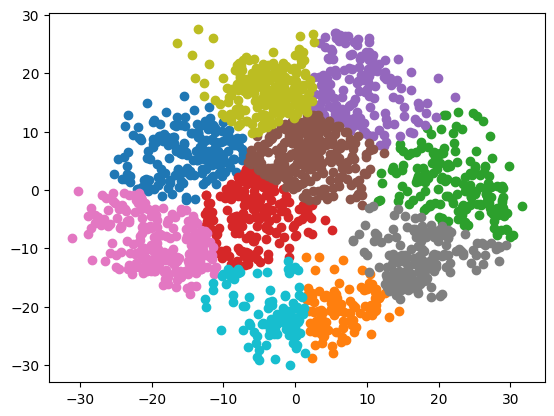

In [38]:
#show all label using chart
for i in range(10):
  flabel=df[label==i]
  plt.scatter(flabel[:,0],flabel[:,1])
plt.show()

In [39]:
#use centroid above chart
centroids=kmeans.cluster_centers_
print(centroids)

[[-14.92697626   6.22301013]
 [  6.33863008 -20.46071373]
 [ 22.39514607   1.0909264 ]
 [ -5.8931547   -4.29648396]
 [  9.03171611  17.12545736]
 [  1.72902028   6.13651096]
 [-18.72406468  -9.2969905 ]
 [ 17.38799275 -11.79728926]
 [ -3.78756593  17.11790078]
 [ -3.4582747  -20.92358434]]


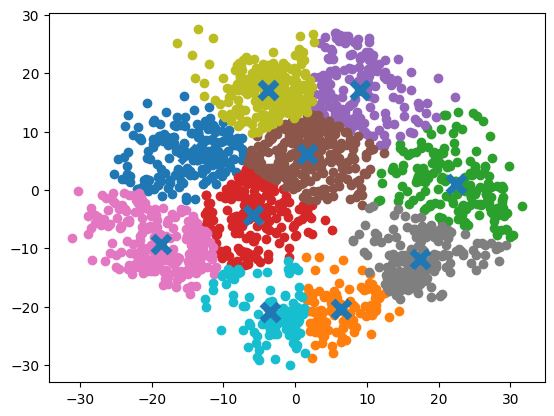

In [44]:
#display centroid using scattter chart
for i in range(10):
  flabel=df[label==i]
  plt.scatter(flabel[:,0],flabel[:,1])
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=150,linewidths=5,zorder=10)
plt.show()

# **K-MEANS Second Example using PCA**

In [58]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('DataforStandardScaler.csv')
data


,Feature1,Feature2,Feature3
0,54.967142,48.617357,56.476885
1,65.230299,47.658466,47.658630
2,65.792128,57.674347,45.305256
3,55.425600,45.365823,45.342702
4,52.419623,30.867198,32.750822
5,44.377125,39.871689,53.142473
6,40.919759,35.876963,64.656488
7,47.742237,50.675282,35.752518
8,44.556173,51.109226,38.490064
9,53.756980,43.993613,47.083063


In [59]:

# Step 2: Apply StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

scaled_data_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_data_df

,Feature1,Feature2,Feature3
0,0.305865,0.460357,1.066539
1,1.587964,0.332271,0.107919
2,1.658150,1.670170,-0.147912
3,0.363137,0.026025,-0.143842
4,-0.012378,-1.910670,-1.512686
5,-1.017067,-0.707870,0.704060
6,-1.448970,-1.241477,1.955731
7,-0.596689,0.735250,-1.186376
8,-0.994700,0.793216,-0.888782
9,0.154688,-0.157272,0.045350


In [65]:
#label the scaled values
label=kmeans.fit_predict(scaled_data)
print(label)


[7 6 5 1 2 0 4 3 8 9]


In [68]:
#apply the pca
pca=PCA(2)
df=pca.fit_transform(scaled_data)
df.shape


(10, 2)

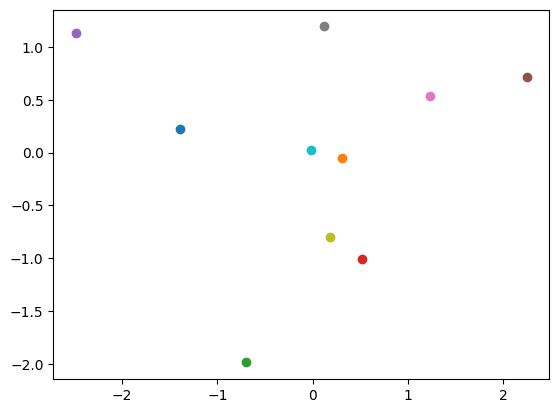

In [69]:
#display the data using chart
for i in range(10):
  flabel=df[label==i]
  plt.scatter(flabel[:,0],flabel[:,1])
plt.show()